<a href="https://colab.research.google.com/github/dmolinasi/TalentoTechDaniela_Molina/blob/main/Neuronal_Network_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

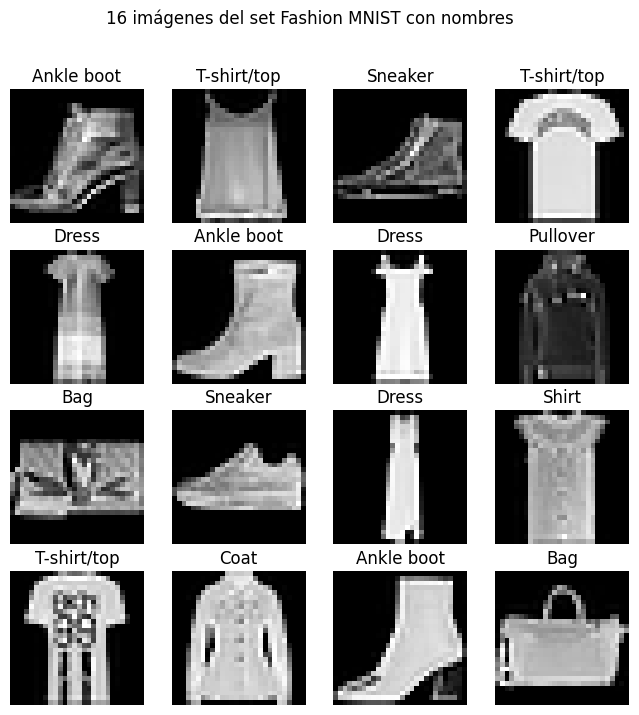

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 17)                  │          13,345 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             180 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,525 (52.83 KB)

 Trainable params: 13,525 (52.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
59/59 - 1s - 14ms/step - accuracy: 0.5187 - loss: 1.3033
Epoch 2/60
59/59 - 1s - 9ms/step - accuracy: 0.7247 - loss: 0.7412
Epoch 3/60
59/59 - 1s - 10ms/step - accuracy: 0.7708 - loss: 0.6409
Epoch 4/60
59/59 - 1s - 9ms/step - accuracy: 0.7940 - loss: 0.5831
Epoch 5/60
59/59 - 1s - 12ms/step - accuracy: 0.8055 - loss: 0.5482
Epoch 6/60
59/59 - 1s - 11ms/step - accuracy: 0.8174 - loss: 0.5172
Epoch 7/60
59/59 - 1s - 11ms/step - accuracy: 0.8215 - loss: 0.5061
Epoch 8/60
59/59 - 1s - 17ms/step - accuracy: 0.8281 - loss: 0.4844
Epoch 9/60
59/59 - 0s - 6ms/step - accuracy: 0.8341 - loss: 0.4700
Epoch 10/60
59/59 - 1s - 10ms/step - accuracy: 0.8348 - loss: 0.4679
Epoch 11/60
59/59 - 1s - 10ms/step - accuracy: 0.8402 - loss: 0.4534
Epoch 12/60
59/59 - 1s - 10ms/step - accuracy: 0.8414 - loss: 0.4484
Epoch 13/60
59/59 - 1s - 11ms/step - accuracy: 0.8446 - loss: 0.4385
Epoch 14/60
59/59 - 0s - 6ms/step - accuracy: 0.8461 - loss: 0.4343
Epoch 15/60
59/59 - 1s - 11ms/step - accuracy: 

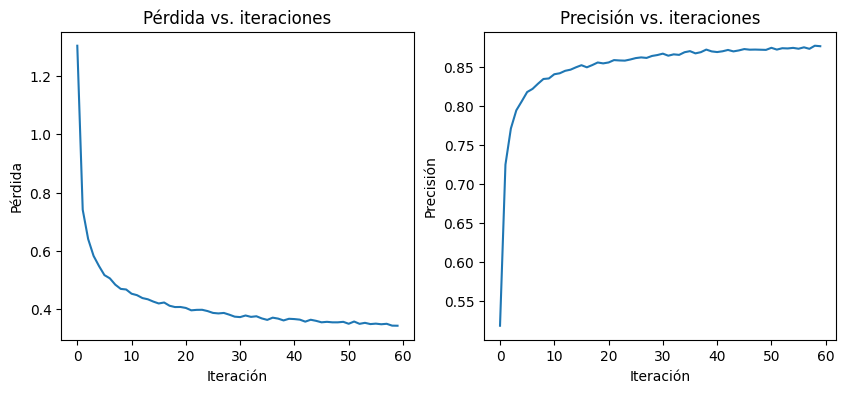

Exactitud en el set de validación: 85.8%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


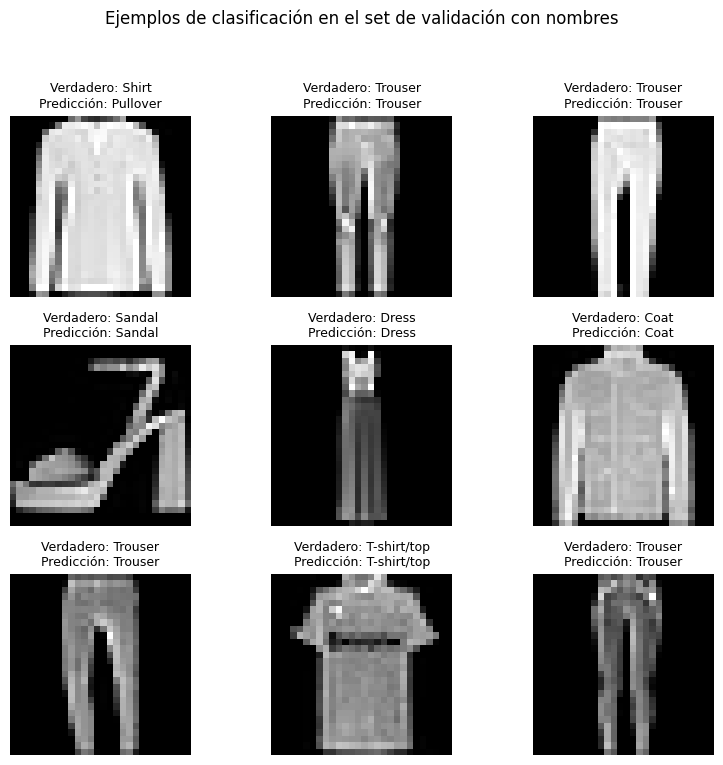

In [ ]:
# Importa las bibliotecas necesarias
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Nombres de las categorías de ropa
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Carga del conjunto de datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualización de algunas imágenes del conjunto de datos con nombres
ids_imgs = np.random.randint(0, x_train.shape[0], 16)
plt.figure(figsize=(8, 8))
for i, idx in enumerate(ids_imgs):
    img = x_train[idx]
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.suptitle('16 imágenes del set Fashion MNIST con nombres')
plt.show()

# Preprocesamiento de los datos
X_train = x_train.reshape(x_train.shape[0], -1) / 255.0
X_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Conversión de las etiquetas a formato one-hot
nclasses = len(class_names)
Y_train = to_categorical(y_train, nclasses)
Y_test = to_categorical(y_test, nclasses)

# Definición del modelo de red neuronal
np.random.seed(1)
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
modelo = Sequential([
    Dense(17, input_dim=input_dim, activation='relu'),
    Dense(output_dim, activation='softmax')
])
modelo.summary()

# Compilación del modelo
sgd = SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Entrenamiento del modelo
num_epochs = 60
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

# Visualización del proceso de entrenamiento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Pérdida vs. iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Precisión vs. iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()

# Evaluación del modelo
puntaje = modelo.evaluate(X_test, Y_test, verbose=0)
print('Exactitud en el set de validación: {:.1f}%'.format(100 * puntaje[1]))

# Realización de predicciones y visualización de algunas predicciones con nombres de categorías
Y_pred = modelo.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
ids_imgs = np.random.choice(range(X_test.shape[0]), 9, replace=False)
plt.figure(figsize=(8, 8))
for i, idx in enumerate(ids_imgs):
    img = X_test[idx].reshape(28, 28)
    cat_original = class_names[np.argmax(Y_test[idx])]
    cat_prediccion = class_names[Y_pred_classes[idx]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Verdadero: {cat_original}\nPredicción: {cat_prediccion}', fontsize=9)

plt.suptitle('Ejemplos de clasificación en el set de validación con nombres')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
